Using TensorFlow backend.


170500096/170498071 [==============================] - 4s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_____________________________________________________

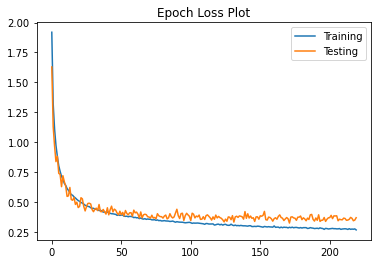

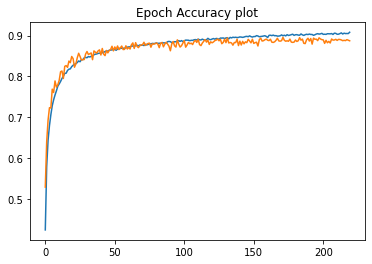

50000/50000 [==============================] - 3s 65us/step

Train Accuracy: 94.41400170326233%
Train Loss: 0.16369661356925963
10000/10000 [==============================] - 1s 64us/step

Test Accuracy: 88.71999979019165%
Test Loss: 0.36682685961723327

Running Time: 5715.6346254348755s


In [1]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers, optimizers
import numpy as np
from matplotlib import pyplot as plt
import time

#loading the cifar10 dataset
(train_data, train_label), (test_data, test_label) = cifar10.load_data()
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')


mean = np.mean(train_data,axis=(0,1,2,3))
std = np.std(train_data,axis=(0,1,2,3))
train_data = (train_data-mean)/(std+1e-7)
test_data = (test_data-mean)/(std+1e-7)

no_of_classes = 10
train_label = np_utils.to_categorical(train_label,no_of_classes)
test_label = np_utils.to_categorical(test_label,no_of_classes)


#model

cnn = Sequential()
cnn.add(Conv2D(32, (3,3), padding='same', input_shape=train_data.shape[1:]))
cnn.add(Activation('relu'))
cnn.add(BatchNormalization())
cnn.add(Conv2D(32, (3,3), padding='same'))
cnn.add(Activation('relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))

cnn.add(Conv2D(64, (3,3), padding='same'))
cnn.add(Activation('relu'))
cnn.add(BatchNormalization())
cnn.add(Conv2D(64, (3,3), padding='same'))
cnn.add(Activation('relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.3))

cnn.add(Conv2D(128, (3,3), padding='same'))
cnn.add(Activation('relu'))
cnn.add(BatchNormalization())
cnn.add(Conv2D(128, (3,3), padding='same'))
cnn.add(Activation('relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.4))

cnn.add(Flatten())
cnn.add(Dense(no_of_classes, activation='softmax'))

cnn.summary()

#data augmentation
augdata = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
    )
augdata.fit(train_data)

starttime=time.time()

#training
batch_size = 64
epochs=220
opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
cnn.compile(loss='categorical_crossentropy',
        optimizer=opt_rms,
        metrics=['accuracy'])
history=cnn.fit_generator(augdata.flow(train_data, train_label, batch_size=batch_size),steps_per_epoch=train_data.shape[0] // batch_size,epochs=220,verbose=1,validation_data=(test_data,test_label))

endtime=time.time()

print('Running Time: {}'.format(endtime-starttime))


plt.figure()
plt.legend(['Training','Testing'],loc='upper right')
plt.title('Epoch Loss Plot')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend(['Training','Testing'],loc='upper right')
plt.show()

plt.title('Epoch Accuracy plot')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.show()

accuracy_score = cnn.evaluate(train_data, train_label, batch_size=128, verbose=1)
print('\nTrain Accuracy: {}%'.format(accuracy_score[1]*100),)
print('Train Loss: {}'.format(accuracy_score[0]))

test_score = cnn.evaluate(test_data, test_label, batch_size=128, verbose=1)
print('\nTest Accuracy: {}%'.format(test_score[1]*100))
print('Test Loss: {}'.format(test_score[0]))

print('\nRunning Time: {}s'.format(endtime-starttime))